In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

In [3]:
#import data 
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


In [4]:
comcast["date_index"] = comcast["Date_month_year"]+" "+comcast["Time"]

In [5]:
comcast["date_index"] = pd.to_datetime(comcast["date_index"])
comcast["Date_month_year"] = pd.to_datetime(comcast["Date_month_year"])

In [6]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [7]:
comcast = comcast.set_index(comcast["date_index"])

In [11]:
comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


In [14]:
comcast["Date_month_year"].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

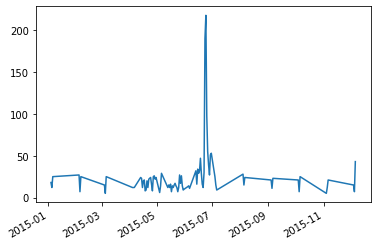

In [15]:
comcast["Date_month_year"].value_counts().plot();

In [16]:
f = comcast.groupby(pd.Grouper(freq="M")).size()

In [17]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

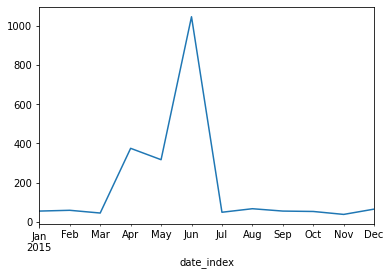

In [18]:
comcast.groupby(pd.Grouper(freq="M")).size().plot()

In [20]:
comcast.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
comcast["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast["Status"]]

In [24]:
comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed


In [25]:
comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [26]:
Status_complaints = comcast.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

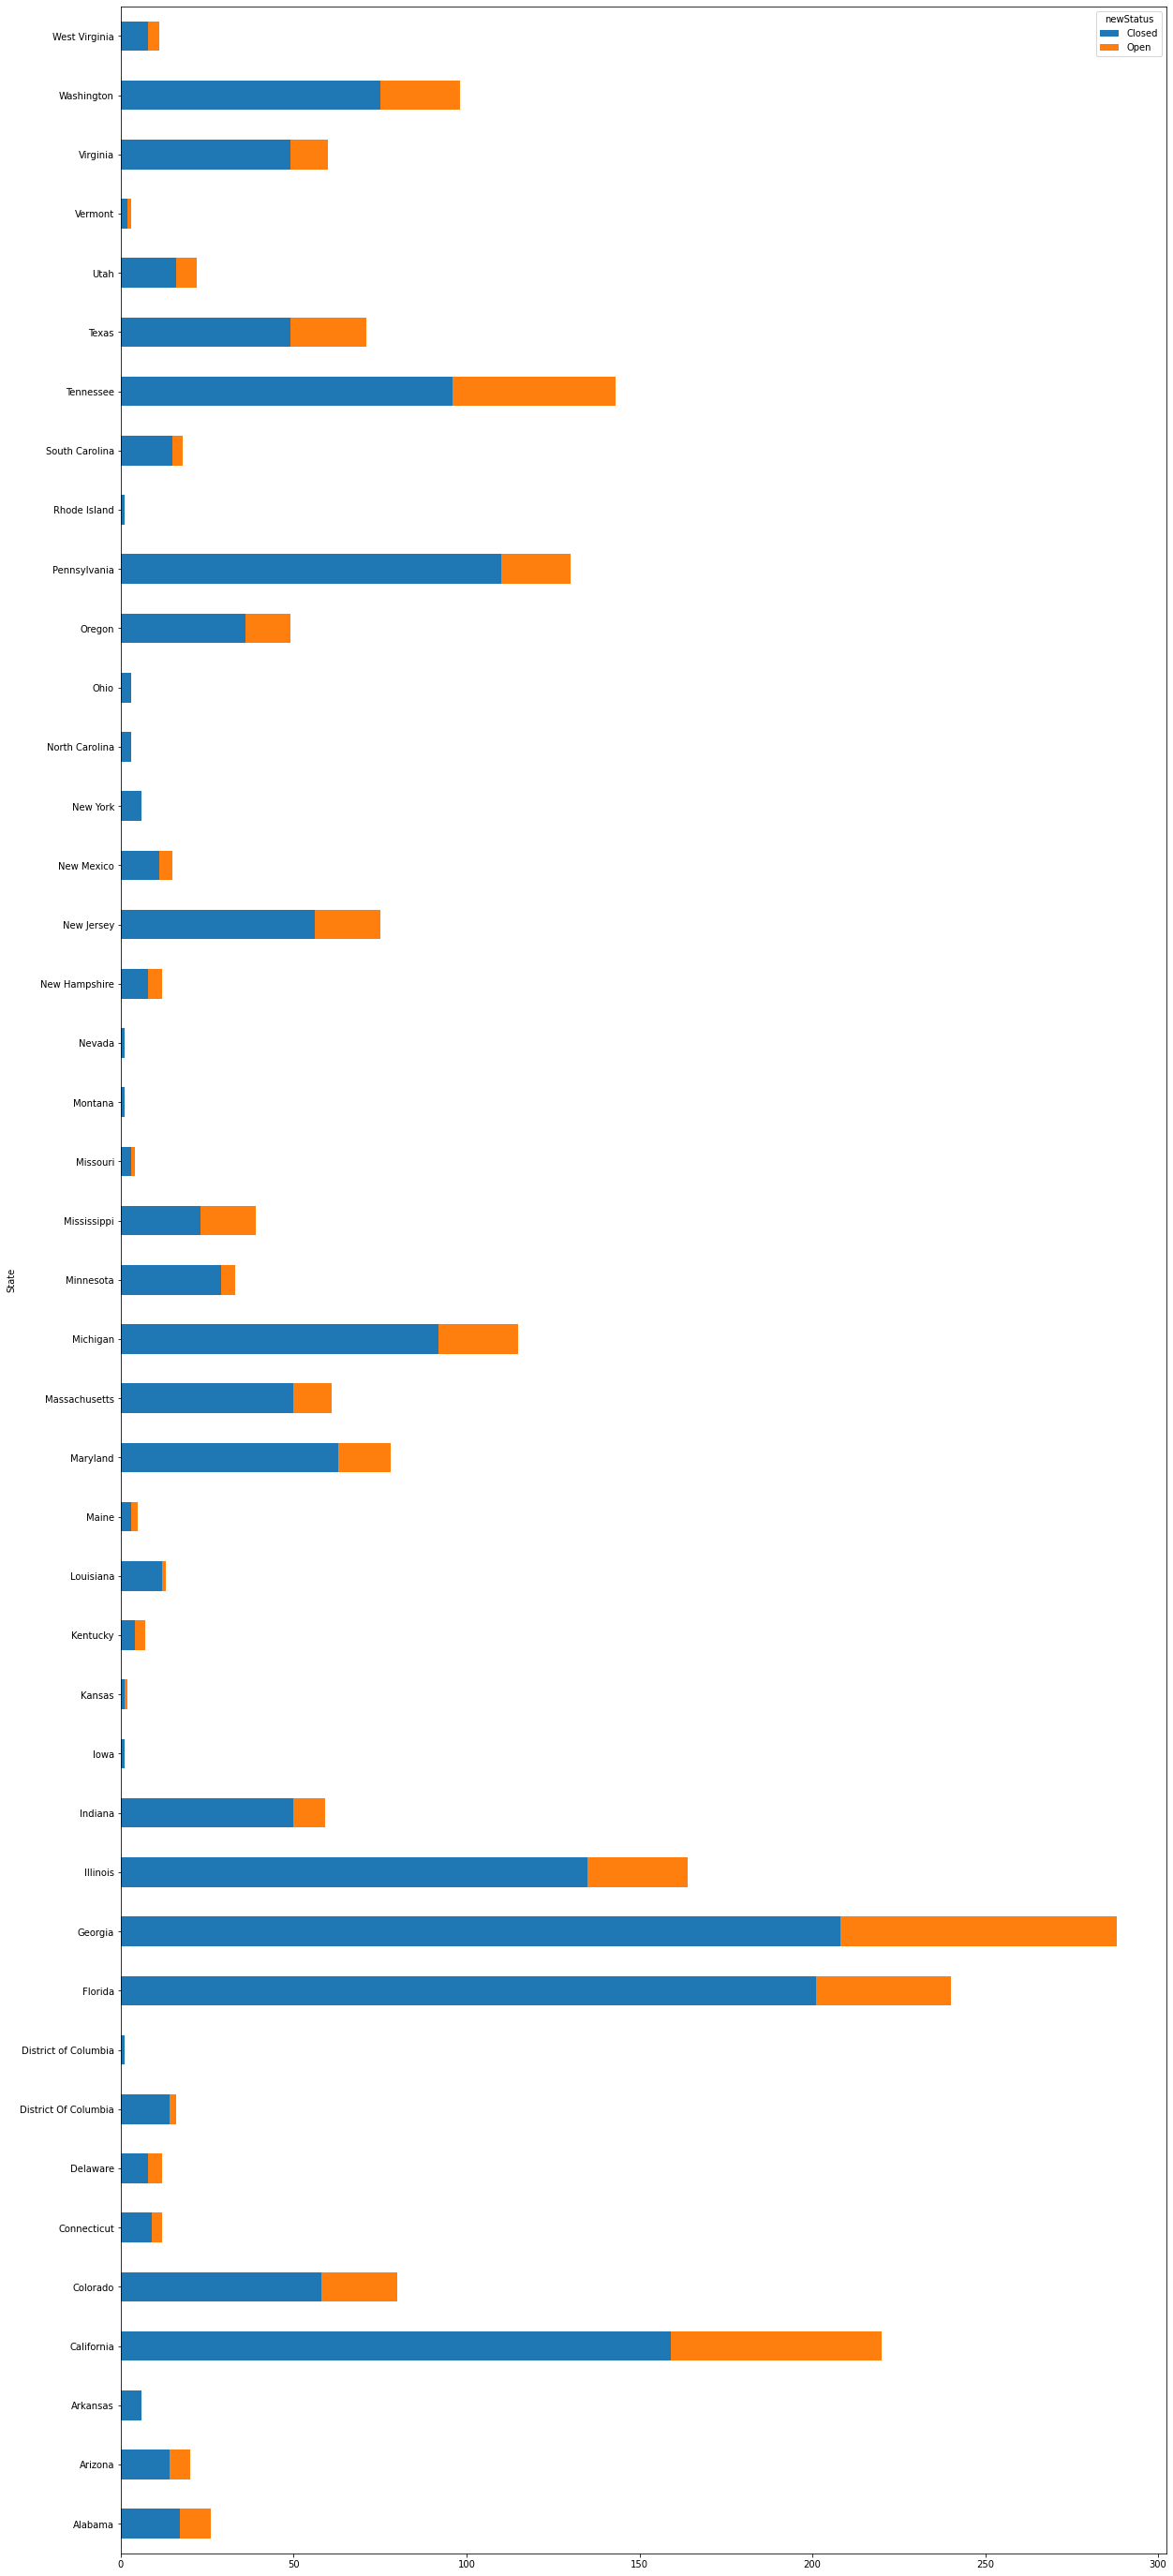

In [29]:
Status_complaints.plot(kind="barh", figsize=(20,50), stacked=True)

In [30]:
comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [31]:
comcast.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [32]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [40]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [37]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [41]:
doc_complete = comcast["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [43]:
import gensim
from gensim import corpora

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [44]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [45]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [46]:
from gensim.models import LdaModel

In [47]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [48]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.249*"internet" + 0.153*"comcast" + 0.140*"service" + 0.019*"problem" + 0.018*"bill" + 0.015*"outage" + 0.013*"back" + 0.012*"business" + 0.011*"phone" + 0.010*"broadband"')

(1, '0.124*"comcast" + 0.055*"throttling" + 0.045*"cable" + 0.030*"bill" + 0.022*"charge" + 0.020*"account" + 0.018*"equipment" + 0.017*"day" + 0.017*"payment" + 0.015*"monopoly"')

(2, '0.097*"practice" + 0.084*"unfair" + 0.074*"billing" + 0.052*"comcast" + 0.040*"pricing" + 0.036*"monopolistic" + 0.020*"paying" + 0.016*"lied" + 0.016*"tucson" + 0.012*"bandwidth"')

(3, '0.136*"comcast" + 0.079*"charge" + 0.025*"contract" + 0.019*"cramming" + 0.017*"3" + 0.015*"email" + 0.015*"year" + 0.014*"appointment" + 0.014*"failure" + 0.014*"lack"')

(4, '0.090*"service" + 0.067*"xfinity" + 0.062*"comcast" + 0.032*"false" + 0.025*"deceptive" + 0.022*"without" + 0.021*"monthly" + 0.019*"connection" + 0.019*"switch" + 0.017*"home"')

(5, '0.118*"service" + 0.090*"comcast" + 0.067*"customer" + 0.031*"poor" + 0.021*"help"

In [49]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [50]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,internet,comcast,practice,comcast,service,service,comcast,data,speed
1,comcast,throttling,unfair,charge,xfinity,comcast,billing,cap,internet
2,service,cable,billing,contract,comcast,customer,issue,comcast,slow
3,problem,bill,comcast,cramming,false,poor,complaint,usage,price
4,bill,charge,pricing,3,deceptive,help,service,fee,high
5,outage,account,monopolistic,email,without,terrible,comcastxfinity,installation,connectivity
6,back,equipment,paying,year,monthly,show,limit,unreliable,pay
7,business,day,lied,appointment,connection,xfinitycomcast,access,without,refund
8,phone,payment,tucson,failure,switch,bad,shitty,asking,promised
9,broadband,monopoly,bandwidth,lack,home,horrible,plan,300gb,2


In [57]:
resolved = comcast.groupby(["Received Via","newStatus"]).size().unstack()
resolved['resolved_percentage'] = (resolved['Closed']/(resolved['Closed']+resolved['Open']))*100
resolved

newStatus,Closed,Open,resolved_percentage
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
